In [1]:
import numpy as np
from network import neural_network
import Optimizers
import loss_funcs as losses
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from layers import Dense


In [2]:
# # generate random data

DATA, LABELS = datasets.make_circles(
                                n_samples = 1000,
                                noise=0.04
                           )
LABELS = LABELS.reshape(LABELS.shape[0],1)

x_train , x_test , y_train , y_test = train_test_split(DATA,LABELS,test_size=0.2)

y_train = np.reshape(y_train,newshape=(y_train.shape[0],1))
y_test = np.reshape(y_test,newshape=(y_test.shape[0],1))
M = x_train.shape[0]
N = x_train.shape[1]


In [3]:
# create a model
model = neural_network()
model = model.sequential(
    [
        Dense(2,20,'relu'),
        Dense(20,1,"sigmoid")
    ]
)


model.compile(
    optimizer= Optimizers.MiniBatchGradientDescent(),
    Cost= losses.BinaryCrossEntropy()
)


In [4]:
model.summary()

Summary of the neural network

--------------------------------------------------

layer with 20 units, 2 inputs and relu activation function

--------------------------------------------------

layer with 1 units, 20 inputs and sigmoid activation function

--------------------------------------------------

input size : 2
output size : 1
optimizer : Mini-Batch Gradient Descent
cost function : Binary Cross Entropy


In [5]:
model , costs = model.fit(DATA,LABELS,0.01,3000)

0 cost : 0.6818203187651106 accuracy : 55.1%
300 cost : 0.03556386020605205 accuracy : 99.5%
600 cost : 0.024009525296588344 accuracy : 99.6%
900 cost : 0.01799281110802263 accuracy : 99.8%
1200 cost : 0.014132382146555482 accuracy : 99.8%
1500 cost : 0.011883911842587344 accuracy : 99.8%
1800 cost : 0.010453022089115232 accuracy : 99.9%
2100 cost : 0.009581387408857316 accuracy : 99.9%
2400 cost : 0.008889652594726636 accuracy : 99.9%
2700 cost : 0.008380049656861354 accuracy : 99.9%


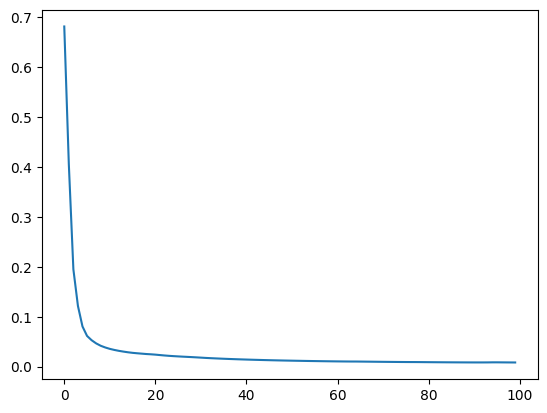

In [6]:
plt.plot(costs)

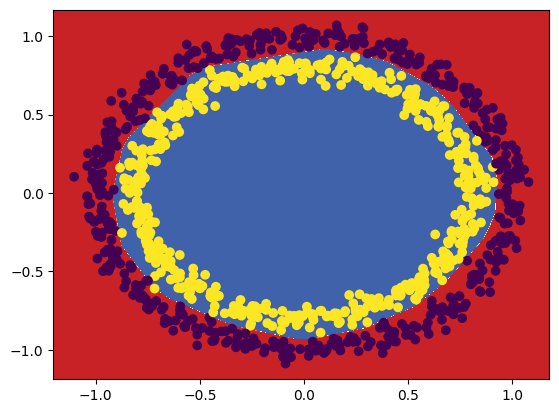

In [7]:
x_min , x_max = DATA[:,0].min() - 0.1 , DATA[:,0].max() + 0.1
y_min , y_max = DATA[:,1].min() - 0.1 , DATA[:,1].max() + 0.1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,1000))
np.linspace(y_min,y_max,100)
x_in = np.c_[xx.ravel(),yy.ravel()]
y_pred = model.predict(x_in).reshape(xx.shape)

plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu)
plt.scatter(DATA[:,0],DATA[:,1],c = LABELS)

In [8]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100
print(f"accuracy : {accuracy}%")

accuracy : 100.0%
